In [1]:
import os
import sys
os.chdir("..") 
%matplotlib inline

In [2]:
# %load c302_MotorToMuscleSynTest.py
import c302
import neuroml.writers as writers


def setup(parameter_set,
          generate=False,
          duration=400,
          dt=0.05,
          target_directory='examples',
          data_reader="UpdatedSpreadsheetDataReader"):
    
    exec ('from parameters_%s import ParameterisedModel' % parameter_set)
    params = ParameterisedModel()

    #params.set_bioparameter("unphysiological_offset_current", "0pA", "Testing TapWithdrawal", "0")
    params.set_bioparameter("unphysiological_offset_current_del", "0 ms", "Testing TapWithdrawal", "0")
    params.set_bioparameter("unphysiological_offset_current_dur", "2000 ms", "Testing TapWithdrawal", "0")

    cells = ['VA1']
    #cells += ['AVAL']
    #cells += ['DB6']

    muscles_to_include = ['MVL07']

  
    cells_to_stimulate = ['VA1']

    cells_to_plot = cells
    reference = "c302_%s_MotorToMuscleSynTest" % parameter_set

    conns_to_include = [
        'VA1-MVL07'
    ]

    conn_polarity_override = {
      
    }

    conn_number_override = {
        'VA1-MVL07':1
    }

    
    

    if generate:
        nml_doc = c302.generate(reference,
                                params,
                                cells=cells,
                                cells_to_plot=cells_to_plot,
                                cells_to_stimulate=cells_to_stimulate,
                                conns_to_include=conns_to_include,
                                conn_polarity_override=conn_polarity_override,
                                conn_number_override=conn_number_override,
                                muscles_to_include=muscles_to_include,
                                duration=duration,
                                dt=dt,
                                target_directory=target_directory,
                                data_reader=data_reader)


    return cells, cells_to_stimulate, params, muscles_to_include, reference


w, x, y, z, reference = setup("C2", generate=True, data_reader="UpdatedSpreadsheetDataReader")

Set default parameters for C
Set default parameters for C2
c302      >>>  
c302      >>> 
c302      >>> Parameters and setting used to generate this network:
c302      >>> 
c302      >>>     Data reader:                    UpdatedSpreadsheetDataReader
c302      >>>     Cells:                          ['VA1']
c302      >>>     Cell stimulated:                ['VA1']
c302      >>>     Connection:                     ['VA1-MVL07']
c302      >>>     Connection numbers overridden:  {'VA1-MVL07': 1}
c302      >>>     Connection numbers scaled:      None
c302      >>>     Connection polarities override: {}
c302      >>>     Muscles:                        ['MVL07']
c302      >>> 
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Loaded morphology: /home/developer/forks/CElegansNeuroML/CElegans/generatedNeuroML2/VA1.cell.nml; id: VA1; placing at location: (-1.35, -235.55, 11.75)
c302      >>>  Finished loading 1 cells


In [3]:
# Replace this with your model path.  
# This example is from https://github.com/OpenSourceBrain/IzhikevichModel.
LEMS_MODEL_PATH = 'examples/LEMS_%s.xml' % reference

In [4]:
from pyneuroml import pynml

pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorToMuscleSynTest.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorToMuscleSynTest.activity.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorToMuscleSynTest.muscles.dat (jNeuroML)
pyNeuroML >>> Reloading: Data loaded from examples/c302_C2_MotorToMuscleSynTest.muscles.activity.dat (jNeuroML)


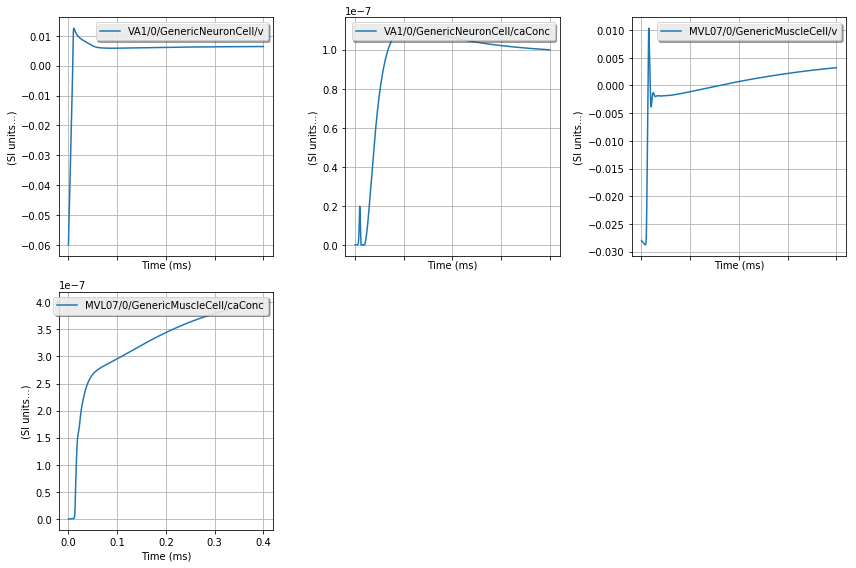

In [5]:
results = pynml.run_lems_with_jneuroml(os.path.split(LEMS_MODEL_PATH)[1], 
                             verbose=False, load_saved_data=True, nogui=True, 
                             exec_in_dir=os.path.split(LEMS_MODEL_PATH)[0],
                             plot=True)